# Project Business Statistics: E-news Express

**Marks: 60**

## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.





### Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [3]:
# complete the code below to load the dataset
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [4]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [5]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [6]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [7]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [8]:
# write your code here to print the numerical summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


##### Observation:

* Both control and treatment have same frquency
* Both new and old landing page have same frequency
* On average user spend 5.38 minutes on the websit
* The minimun time spent on the website is 0.19 minutes and maximun is 10.71 minutes
* 75% of users spend 7.02 minutes or less on the website
* The mean is less than the median which mean the distribution is slightly left skewed
* In the 100 people that visited the website 54 were converted
* Spanish is the preferred language

#### Getting the statistical summary for the categorical variables

In [53]:
# write your code here to print the categorical summary statistics
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


### Check for missing values

In [10]:
# write your code here 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [11]:
# write your code here  
df.duplicated().sum()

0

### Univariate Analysis

#### Time spent on the page

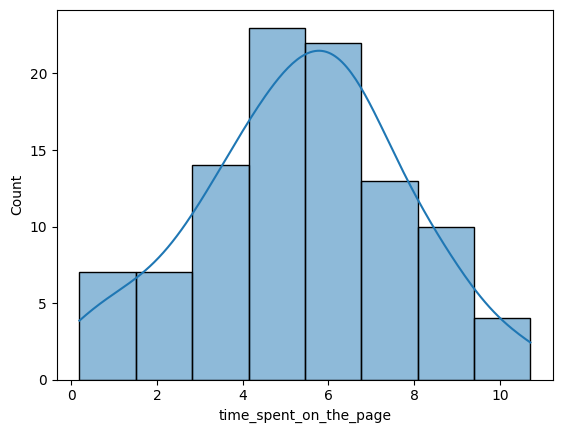

In [49]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.savefig('Time_spent_on_the_page_hist.png', dpi=300, bbox_inches='tight')

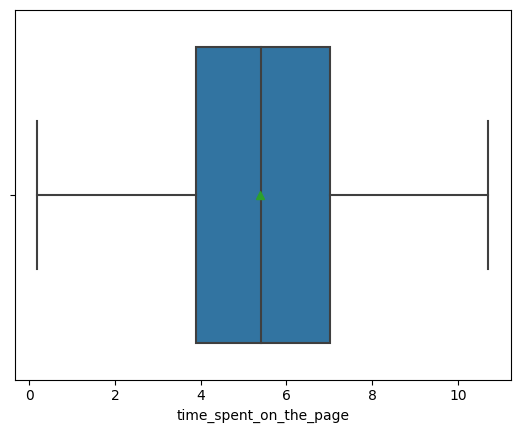

In [48]:
sns.boxplot(data=df,x='time_spent_on_the_page',showmeans=True)
plt.savefig('Time_spent_on_the_page.png', dpi=300, bbox_inches='tight')

In [54]:
from scipy.stats import shapiro

time_spent = df.loc[:, 'time_spent_on_the_page']

shapiro(time_spent)

ShapiroResult(statistic=0.9887408018112183, pvalue=0.5643193125724792)

Observation:

* 50% of users spend 5.415 minutes and more on the website
* The distribution is slightly left skewed
* There are no outliers

#### Group

In [13]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

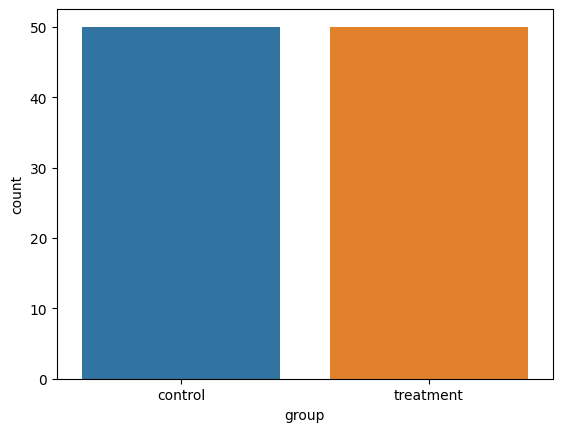

In [14]:
sns.countplot(data=df, x='group')
plt.savefig('Group.png', dpi=300, bbox_inches='tight')

##### Observation:

* Both control and treatnment group have same number users

#### Landing page

In [15]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

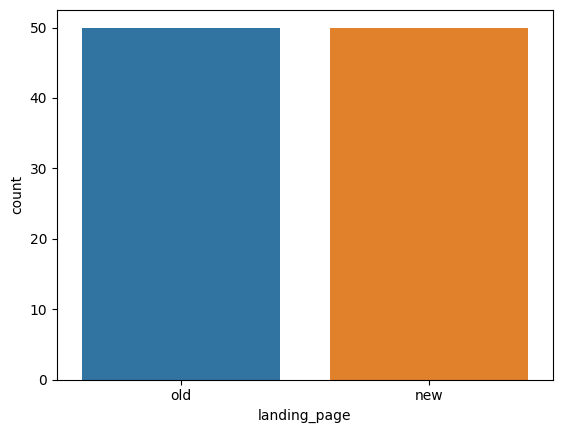

In [16]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.savefig('landing_page.png', dpi=300, bbox_inches='tight')

##### Observation:

* Both new and old landing page have same number visits

#### Converted

In [17]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

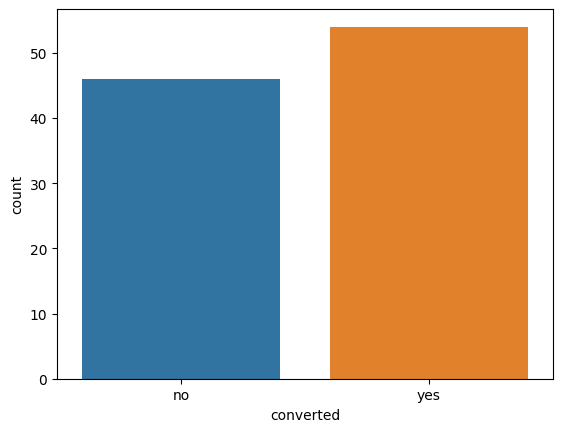

In [18]:
# complete the code to plot the countplot
sns.countplot(data=df,x='converted')
plt.savefig('converted_.png', dpi=300, bbox_inches='tight')

##### Observation:

* 54% of users were converted

#### Language preferred

In [19]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

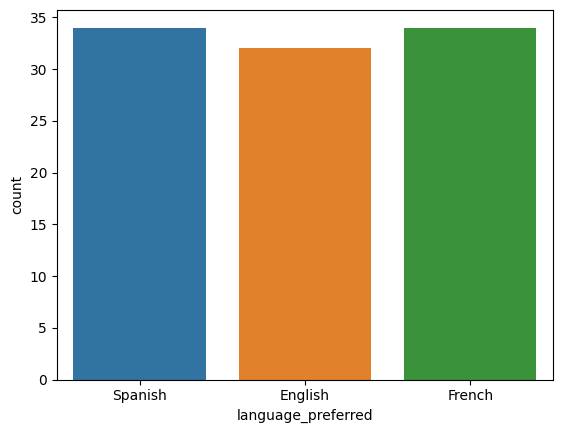

In [20]:
# complete the code to plot the countplot
sns.countplot(data=df,x='language_preferred')
plt.savefig('language_preferred.png', dpi=300, bbox_inches='tight')

##### Observation:

* Both Spanish and French are the most preferred languages with 34% then English follow with 32%

### Bivariate Analysis

#### Landing page vs Time spent on the page

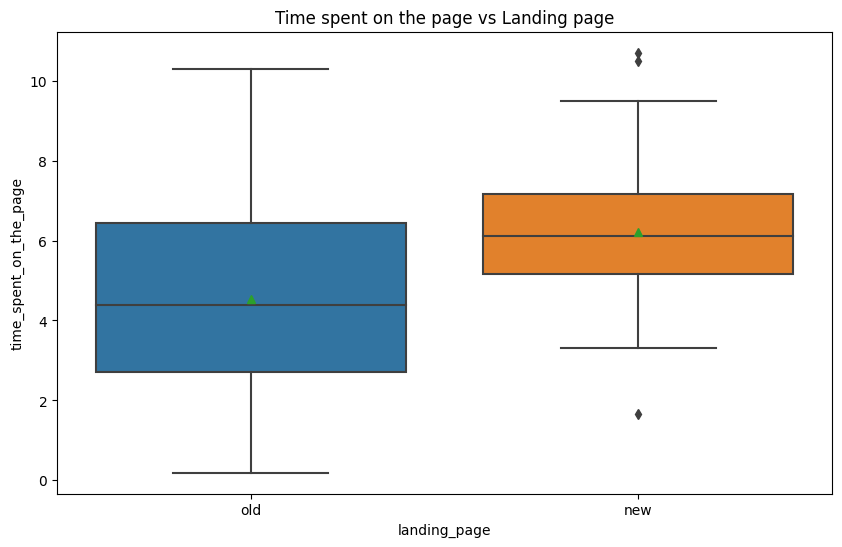

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page',showmeans=True)
plt.title('Time spent on the page vs Landing page')
plt.savefig('TSP_LP.png', dpi=300, bbox_inches='tight')

##### Observation:

* On average users spend more time on the website with new landing page vis a vis the old landing page
* There are outliers in the time spent on website with new landing page

#### Conversion status vs Time spent on the page

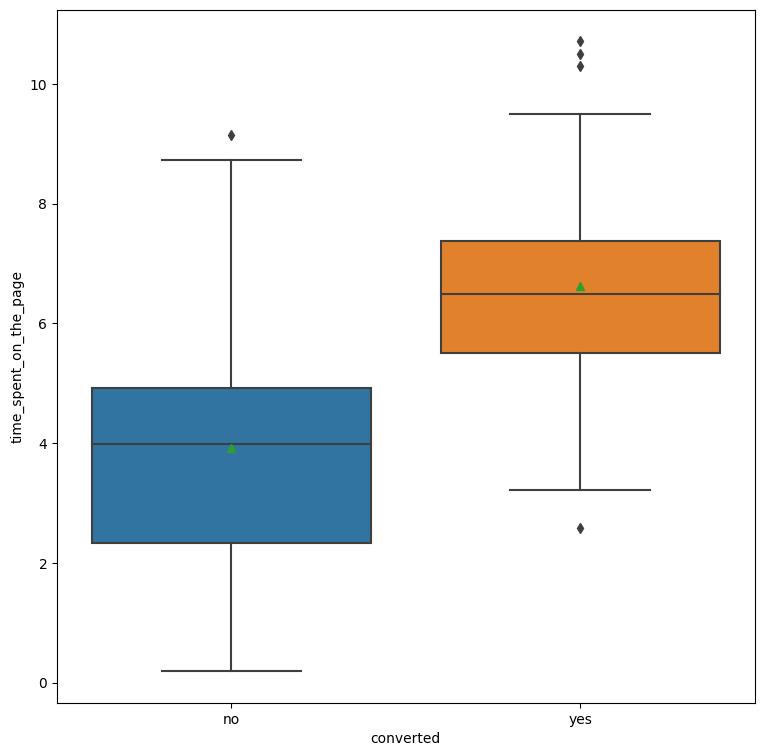

In [22]:
# complete the code to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x='converted',y='time_spent_on_the_page',showmeans=True)
plt.savefig('Converted vs TSP.png', dpi=300, bbox_inches='tight')

##### Observation:

* On average users who spend more time in the website got converted
* There are outliers in users who got converted
* There are outliers in the upper side on users who were not converted

#### Language preferred vs Time spent on the page

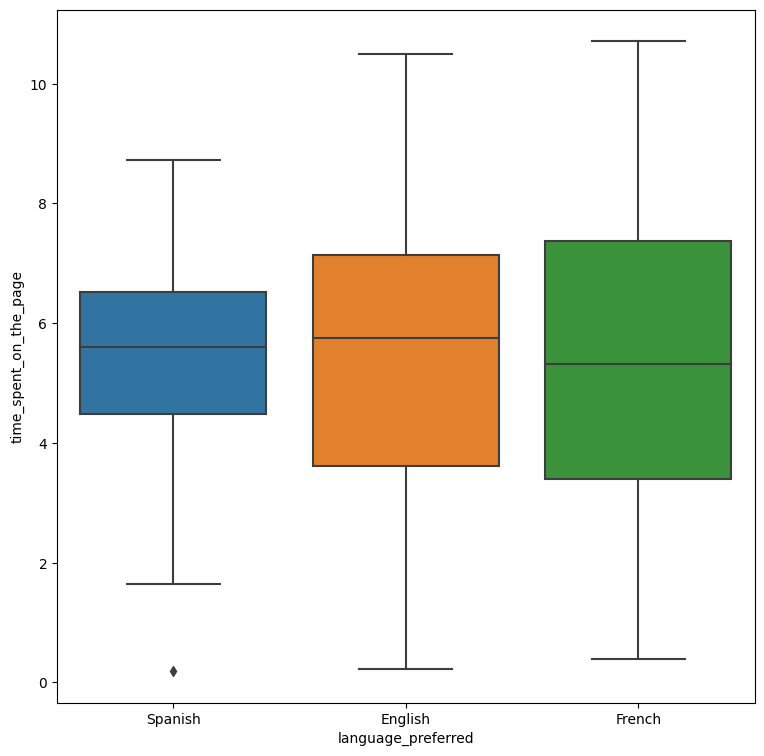

In [23]:
# write the code to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x='language_preferred',y='time_spent_on_the_page')
plt.savefig('Language P vs TSP.png', dpi=300, bbox_inches='tight')

##### Observation:

* Users who speak English spend more time on the webiste,followed by French speaking users then Spanish speaking users
* There are outliers on the lower side for Spanish speaking users

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

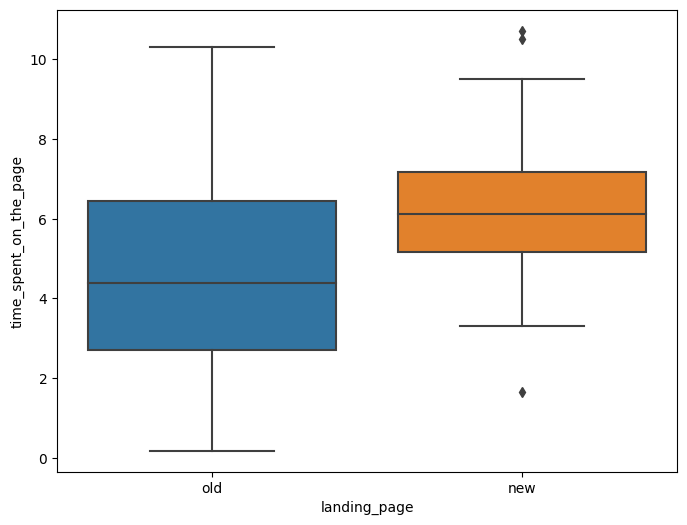

In [24]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.savefig('Landing P vs TSP.png', dpi=300, bbox_inches='tight')

##### Observation:

* Users spend more time on the website with the new landig page

### Step 1: Define the null and alternate hypotheses

null hypothesis

$H_0$: $\mu_1$ = $\mu_2$


alternate hypothesis

$H_a$: $\mu_1$ > $\mu_2$



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.


Two Independent Sample T-test for Equality of Means - Standard deviation unknown

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [25]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page'] ##Complete the code

In [50]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [27]:
# complete the code to import the required function
from scipy.stats import ttest_ind 

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = True, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [28]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

We do have enough statistical evidence that users spend more time in the new landig page

#### A similar approach can be followed to answer the other questions.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

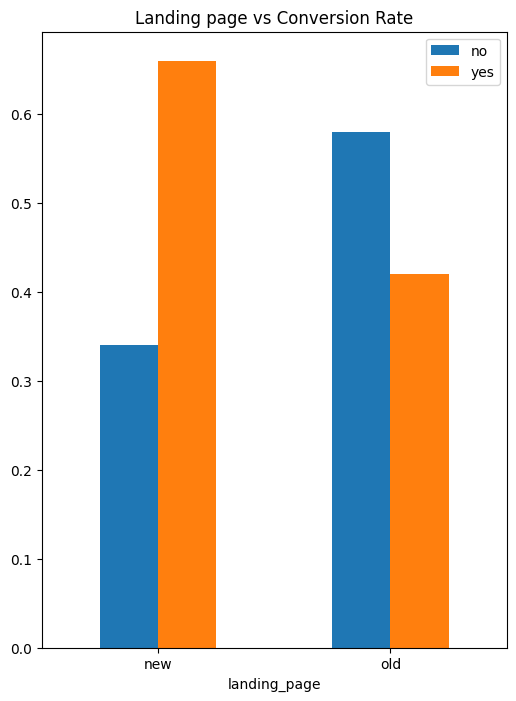

In [51]:
# complete the code to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=False)
plt.legend()
plt.xticks(rotation=360)
plt.title('Landing page vs Conversion Rate')
plt.savefig('Landing P vs Converted.png', dpi=300, bbox_inches='tight')

##### Observation:

* It can be observed in the pie chart that the conversion rate on the website with new landing page is greater that the conversion rate on the website with old landing page.

### Step 1: Define the null and alternate hypotheses

null hypothesis

$H_0:$ $p_1$ = $p_2$

alternate hypothesis

$H_a:$ $p_1$ > $p_2$



### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

Z-test for proportions

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [30]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] # complete your code here

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [31]:
!pip install statsmodels

In [32]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest   

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [33]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* We do have enough statistical evidence that the conversion rate for the new landing page is greater than the conversion rate in the old landing page.

## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

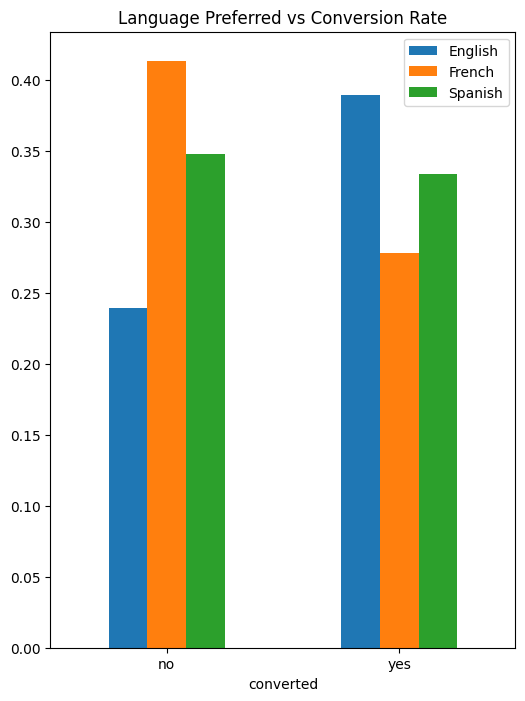

In [34]:
# complete the code to visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=False)
plt.legend()
plt.xticks(rotation=360)
plt.title('Language Preferred vs Conversion Rate')
plt.savefig('Language P vs Converted.png', dpi=300, bbox_inches='tight')

### Step 1: Define the null and alternate hypotheses

$H_0:$ Conversion is independent of language

$H_a:$ Conversion is NOT independent of language



### Step 2: Select Appropriate test

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. **Based on this information, select the appropriate test.**

Chisquare test

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [35]:
# complete the code to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])  

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [36]:
# complete the code to import the required function
from scipy.stats import chi2_contingency  

# write the code to calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [37]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

We do have enough statistical evidence that the conversion is independent of the languages

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [38]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

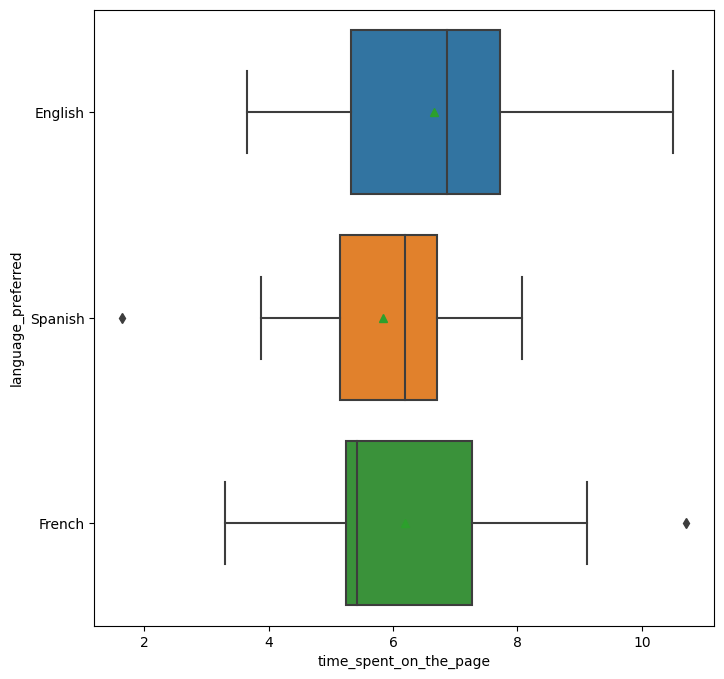

In [52]:
# complete the code to visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.savefig('TSP vs Language preferred.png', dpi=300, bbox_inches='tight')

##### Observation:

* There is a difference on time spent on the new landing page for the different langauages

* On average english speaking users spend more time on the new landing page

* There are outliers in the lower side for spanish spaking users and in the upper side for french speaking users

In [40]:
# complete the code to calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ $\mu_1$ = $\mu_2$ = $\mu_3$ 

$H_a:$ At least one average time spent on the new landing page is different from the rest.



### Step 2: Select Appropriate test

This is a problem, concerning three population means. **Based on this information, select the appropriate test to compare the three population means.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [41]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   # complete your code here
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   # complete your code here

### Step 5: Calculate the p-value

In [42]:
# complete the code to import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [43]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

##### Observation:

* We do have enough statistical evidene to conclude that the average time spent on the new page is same for all languages.

## Conclusion and Business Recommendations


Conclusion:
* DataFrame contains 100 rows and 6 columns
* Both control and treatment have same frquency
* Both new and old page have same frequency
* On average user spend 5.38 minutes on the website
* The minimun time spent on the website is 0.19 minutes and maximun is 10.71 minutes
* 75% of visits spend 7.02 minutes or less on the webiste
* In the 100 people that visited the website 54 were converted
* Spanish is the preferred language
* There are no missing values in the DataFrame
* There are not duplicated values in the DataFrame
* 50% of users spend 5.7 minutes and more on the website
* The distribution of time spent on the website is slightly left skewed
* 54% of users were converted after visiting the website
* Both Spanish and French are the most preferred languages with 34% then English follow with 32%
* On average users in the treatment group spend more time on the website compared to users in the control group
* There are outliers in the treatment group
* On average users spend more time on the website with new landing page vis a vis the old landing page
* On average users who spend more time in the website got converted
* There are outliers in users who got converted
* There are outliers in the upper side on users who were not converted
* There are outliers in the time spent on website with new landing page
* users who speak English spend more time on the webiste,followed by French speaking users then Spanish speaking users
* There are outliers on the lower side for Spanish speaking users
* users in the control group visited only the website with old landing page wheras Visitors in the treatment group visited only the website with new landing page
* Most users speak French and Spanish in both control and treatment group
* There are more converted users in the new landing page
* English speaking users are the most converted
* French speaking users are the least converted
* We do have enough statistical evidence that users spend more time in the new landig page
* We do have enough statistical evidence that the conversion rate for the new landing page is greater than the conversion rate in the old landing page
* We do have enough statistical evidence that the conversion is independent of the languages
* Even if the time spent on the new page for the 3 languages seems to be different,We do not have enough statistical evidene to prove that.


##### Business Recommendations
* E-news Express should go with the website with the new landing page because:

    1. Users spend more time on the website with the new landing page.
    2. Conversion rate is high on the website with the new landing page.
* E-news Express should find a way of reaching more users who speak English as they spend more time on the website with new landing page; they are also the most converted after visiting the website with new landing page.

* E-news Express should also increase their visibility or advertise their portal to users who speak Spanish and French as most users who visited the website with the new landing page speak those 2 languages.

___